In [1]:
# Import libraries
import pandas as pd


In [2]:
# Load the Open LLM Leaderboard dataset
# This dataset contains performance metrics and metadata for various open source language models
df = pd.read_csv("data/open_llm_leaderboard.csv")

# Display the first 5 rows of the dataset to get an initial view of:
# - Model names and types
# - Performance metrics
# - Architecture details
# - Submission dates and other metadata
df.head()

,eval_name,Precision,Type,T,Weight type,Architecture,Model,fullname,Model sha,Average ⬆️,...,GPQA,MUSR Raw,MUSR,MMLU-PRO Raw,MMLU-PRO,Maintainer's Highlight,Upload To Hub Date,Submission Date,Generation,Base Model
0,0-hero_Matter-0.2-7B-DPO_bfloat16,bfloat16,"💬 chat models (RLHF, DPO, IFT, ...)",💬,Original,MistralForCausalLM,"<a target=""_blank"" href=""https://huggingface.c...",0-hero/Matter-0.2-7B-DPO,26a66f0d862e2024ce4ad0a09c37052ac36e8af6,8.805656,...,1.230425,0.381375,5.871875,0.116356,1.817376,False,2024-04-13,2024-08-05,0,0-hero/Matter-0.2-7B-DPO
1,01-ai_Yi-1.5-34B_bfloat16,bfloat16,🟢 pretrained,🟢,Original,LlamaForCausalLM,"<a target=""_blank"" href=""https://huggingface.c...",01-ai/Yi-1.5-34B,4b486f81c935a2dadde84c6baa1e1370d40a098f,25.432496,...,15.436242,0.423604,11.217188,0.466589,40.732122,True,2024-05-11,2024-06-12,0,01-ai/Yi-1.5-34B
2,01-ai_Yi-1.5-34B-32K_bfloat16,bfloat16,🟢 pretrained,🟢,Original,LlamaForCausalLM,"<a target=""_blank"" href=""https://huggingface.c...",01-ai/Yi-1.5-34B-32K,2c03a29761e4174f20347a60fbe229be4383d48b,26.400622,...,15.100671,0.439823,14.077865,0.470911,41.212323,True,2024-05-15,2024-06-12,0,01-ai/Yi-1.5-34B-32K
3,01-ai_Yi-1.5-34B-Chat_bfloat16,bfloat16,"💬 chat models (RLHF, DPO, IFT, ...)",💬,Original,LlamaForCausalLM,"<a target=""_blank"" href=""https://huggingface.c...",01-ai/Yi-1.5-34B-Chat,f3128b2d02d82989daae566c0a7eadc621ca3254,32.627883,...,15.324385,0.428198,13.058073,0.452045,39.116061,True,2024-05-10,2024-06-12,0,01-ai/Yi-1.5-34B-Chat
4,01-ai_Yi-1.5-34B-Chat-16K_bfloat16,bfloat16,"💬 chat models (RLHF, DPO, IFT, ...)",💬,Original,LlamaForCausalLM,"<a target=""_blank"" href=""https://huggingface.c...",01-ai/Yi-1.5-34B-Chat-16K,ff74452e11f0f749ab872dc19b1dd3813c25c4d8,28.975559,...,11.744966,0.439760,13.736719,0.454455,39.383865,True,2024-05-15,2024-07-15,0,01-ai/Yi-1.5-34B-Chat-16K


In [3]:
# 1. Basic Dataset Information
# Display basic information about the dataset structure
print("=== Dataset Structure ===")
df.info()
print("\n")

# Display dataset dimensions
print(f"=== Dataset Dimensions ===")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n")

# 2. Missing Values Analysis
print("=== Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_values_pct = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_pct
}).sort_values('Missing Values', ascending=False)
print(missing_data[missing_data['Missing Values'] > 0])  # Only show columns with missing values
print("\n")

# 3. Statistical Summary
print("=== Statistical Summary ===")
print(df.describe())
print("\n")

# 4. Column Overview
print("=== Column Names ===")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

=== Dataset Structure ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   eval_name               1500 non-null   object 
 1   Precision               1500 non-null   object 
 2   Type                    1500 non-null   object 
 3   T                       1500 non-null   object 
 4   Weight type             1500 non-null   object 
 5   Architecture            1500 non-null   object 
 6   Model                   1500 non-null   object 
 7   fullname                1500 non-null   object 
 8   Model sha               1494 non-null   object 
 9   Average ⬆️              1500 non-null   float64
 10  Hub License             1255 non-null   object 
 11  Hub ❤️                  1500 non-null   int64  
 12  #Params (B)             1500 non-null   int64  
 13  Available on the hub    1500 non-null   bool   
 14  Not_Merged    

In [4]:
# Get unique model families by looking at base models
print("=== Unique Model Families ===")
print(df['Base Model'].nunique(), "unique base models")
print("\nSample of model families:")
print(df['Base Model'].value_counts().head())

# Look at the distribution of precision types
print("\n=== Precision Types Used ===")
print(df['Precision'].value_counts())

# If there are performance metrics, let's see their distribution
performance_metrics = df.select_dtypes(include=['float64', 'int64']).columns
print("\n=== Available Numerical Metrics ===")
print(performance_metrics.tolist())

=== Unique Model Families ===
1132 unique base models

Sample of model families:
Base Model
Removed                                66
meta-llama/Meta-Llama-3.1-8B           32
mistralai/Mistral-7B-v0.1              21
meta-llama/Meta-Llama-3-8B-Instruct    19
meta-llama/Meta-Llama-3-8B             17
Name: count, dtype: int64

=== Precision Types Used ===
Precision
bfloat16    1129
float16      369
4bit           2
Name: count, dtype: int64

=== Available Numerical Metrics ===
['Average ⬆️', 'Hub ❤️', '#Params (B)', 'IFEval Raw', 'IFEval', 'BBH Raw', 'BBH', 'MATH Lvl 5 Raw', 'MATH Lvl 5', 'GPQA Raw', 'GPQA', 'MUSR Raw', 'MUSR', 'MMLU-PRO Raw', 'MMLU-PRO', 'Generation']


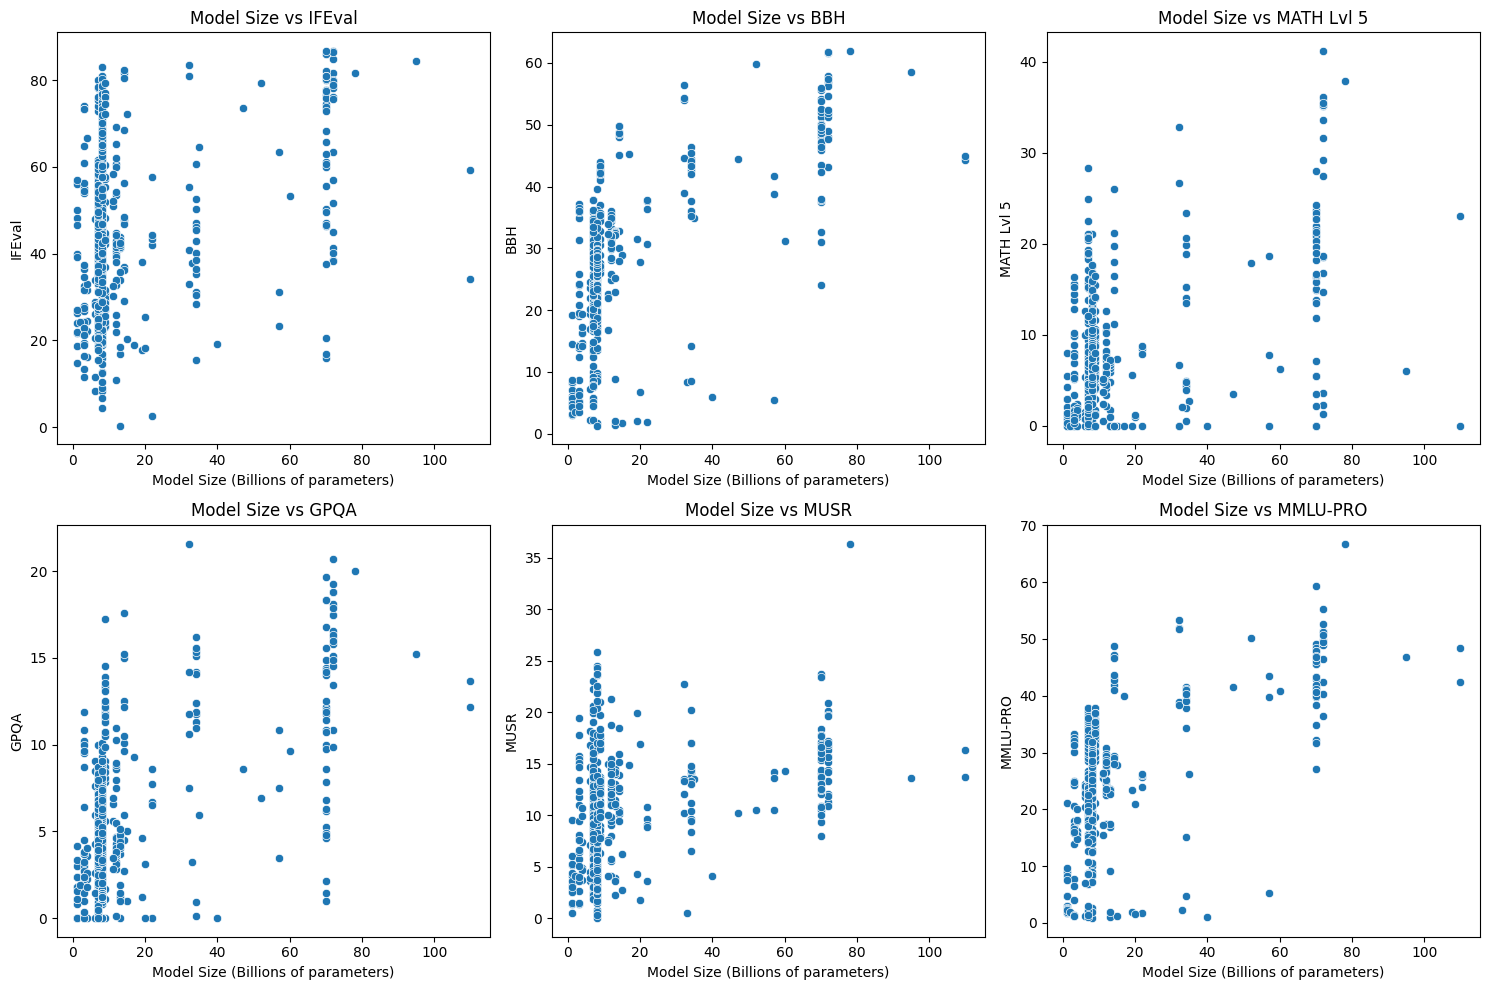

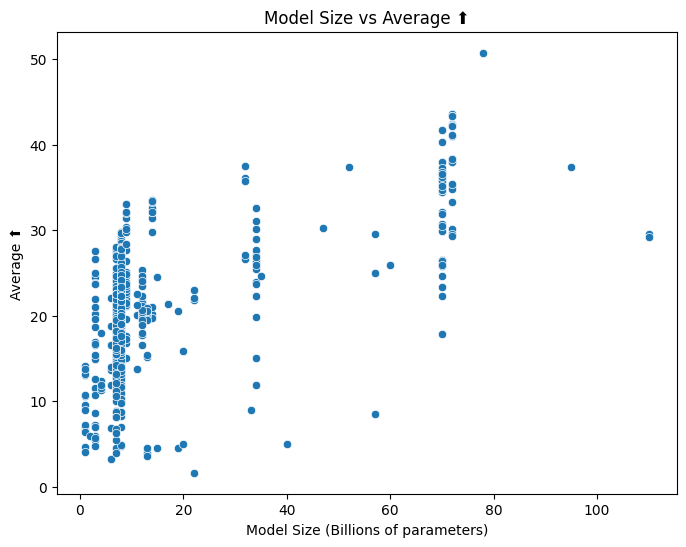


Correlation with model size:
IFEval: 0.260
BBH: 0.622
MATH Lvl 5: 0.497
GPQA: 0.574
MUSR: 0.370
MMLU-PRO: 0.597
Average ⬆️: 0.588


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extract model size (in billions of parameters) from the model name
def extract_model_size(name):
    try:
        # Look for patterns like "7B", "13B", "70B" in the name
        size = [int(s.replace('B','')) for s in name.split('-') if 'B' in s and s.replace('B','').isdigit()]
        return size[0] if size else None
    except:
        return None

# Add model size column
df['model_size'] = df['Base Model'].apply(extract_model_size)

# Create a figure with multiple subplots for different metrics
plt.figure(figsize=(15, 10))

# Select metrics to plot
metrics = ['IFEval', 'BBH', 'MATH Lvl 5', 'GPQA', 'MUSR', 'MMLU-PRO']

# Create scatter plots for first 6 metrics
for i, metric in enumerate(metrics, 1):
    if metric in df.columns:
        plt.subplot(2, 3, i)
        sns.scatterplot(data=df, x='model_size', y=metric)
        plt.title(f'Model Size vs {metric}')
        plt.xlabel('Model Size (Billions of parameters)')
        plt.ylabel(f'{metric}')

plt.tight_layout()
plt.show()

# Create separate plot for Average ⬆️
plt.figure(figsize=(8, 6))
if 'Average ⬆️' in df.columns:
    sns.scatterplot(data=df, x='model_size', y='Average ⬆️')
    plt.title('Model Size vs Average ⬆️')
    plt.xlabel('Model Size (Billions of parameters)')
    plt.ylabel('Average ⬆️')
plt.show()

# Print correlation coefficients
print("\nCorrelation with model size:")
for metric in metrics + ['Average ⬆️']:
    if metric in df.columns:
        correlation = df['model_size'].corr(df[metric])
        print(f"{metric}: {correlation:.3f}")

In [13]:
print("\nModel families and their counts:")
print(df['Base Model'].apply(lambda x: x.split('/')[0]).value_counts())


Model families and their counts:
Base Model
meta-llama         107
Qwen                88
Removed             66
mistralai           52
allknowingroger     49
                  ... 
moreh                1
adamo1139            1
alcholjung           1
aloobun              1
zhengr               1
Name: count, Length: 335, dtype: int64


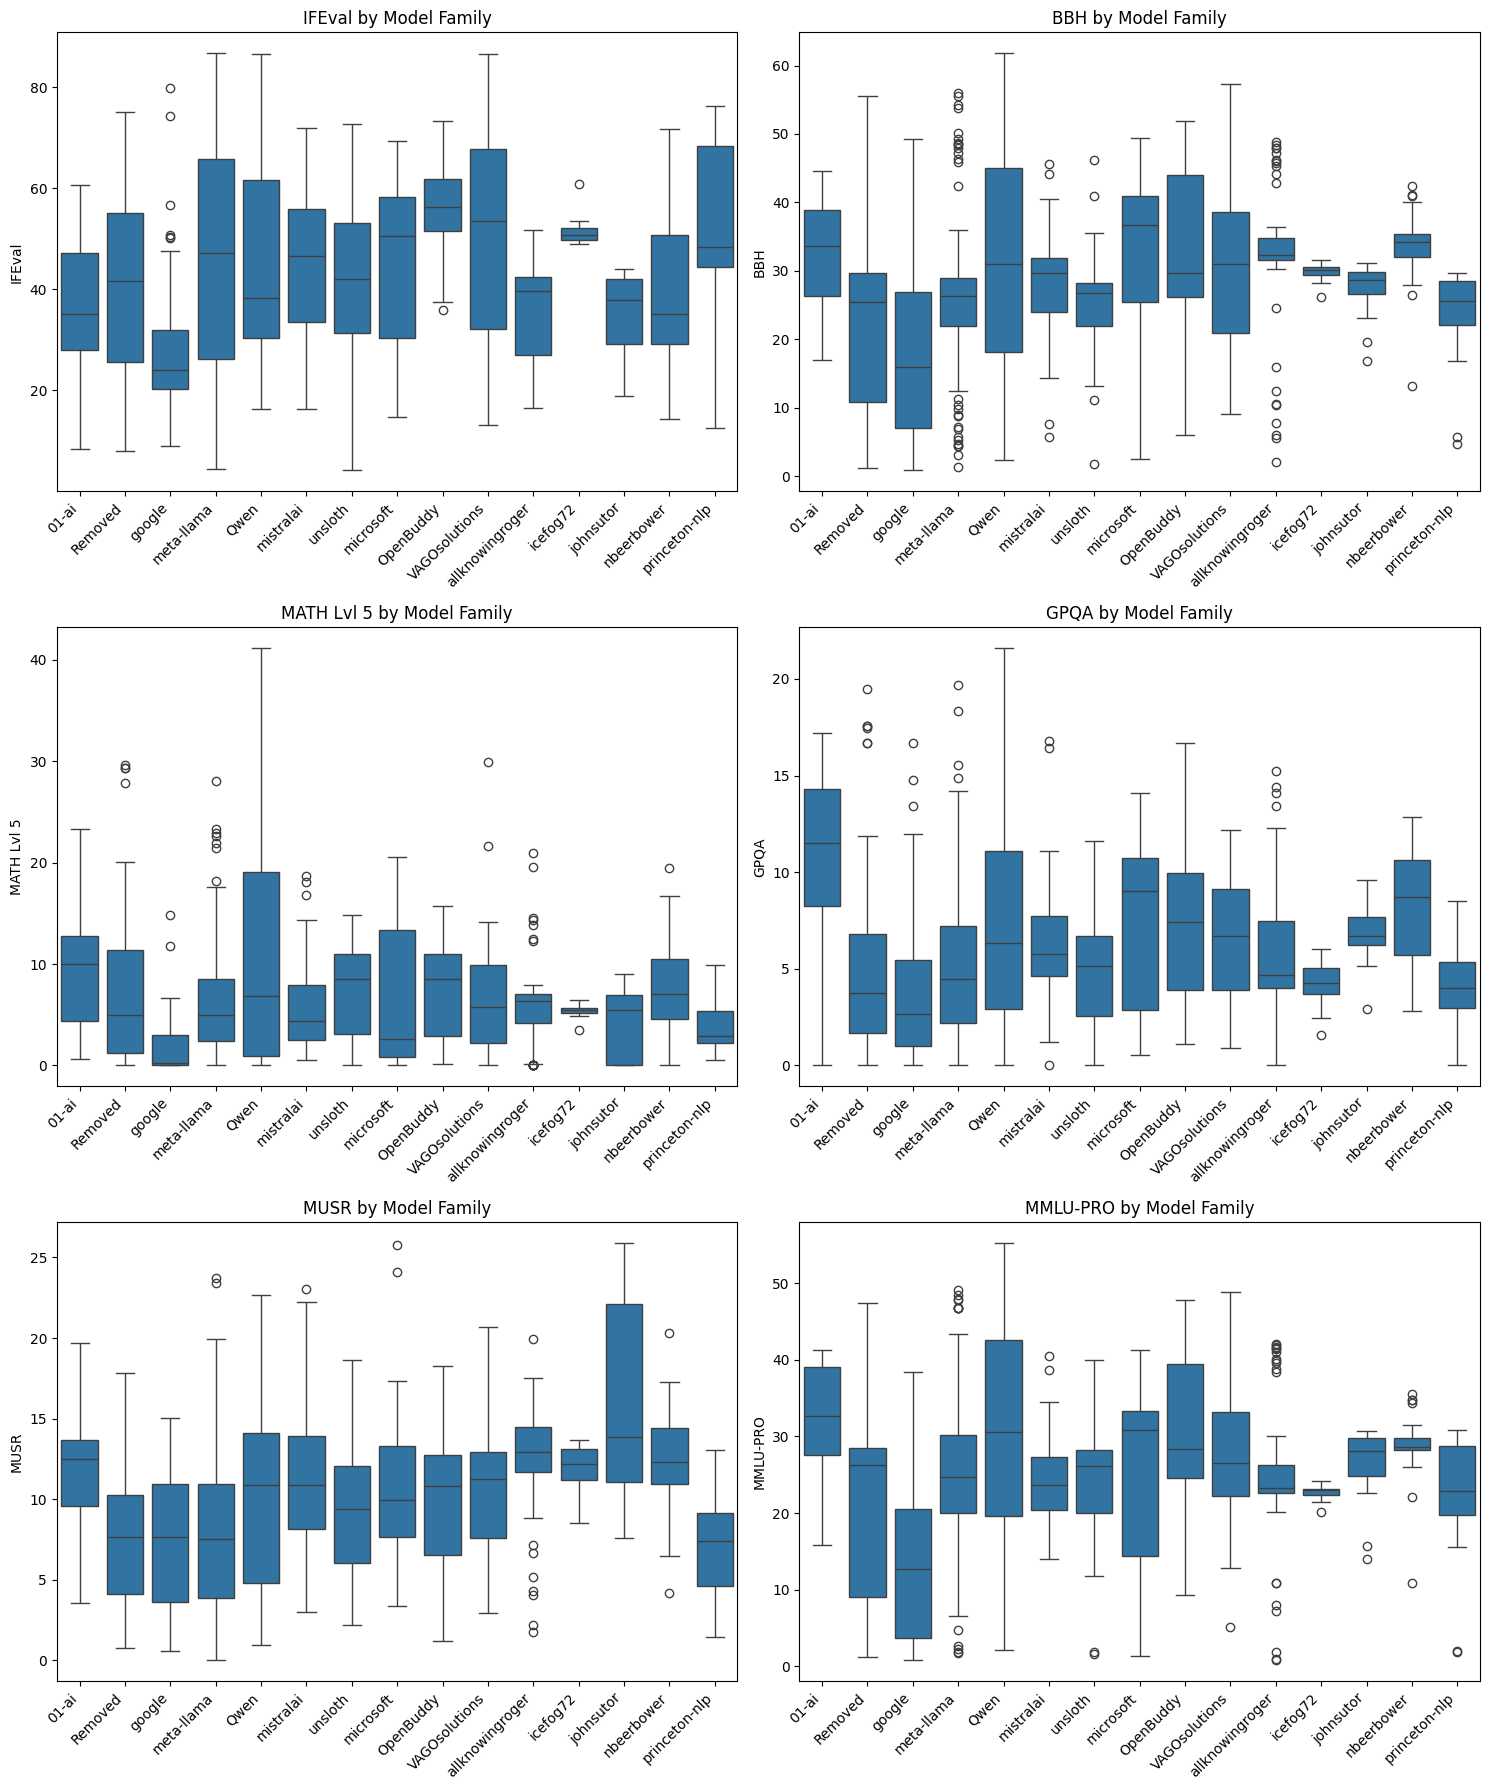


Summary Statistics for Top Model Families:

=== IFEval ===
                  mean    std  count
model_family                        
01-ai            37.08  14.03     24
OpenBuddy        54.98  11.20     14
Qwen             45.43  21.01     88
Removed          40.56  19.36     66
VAGOsolutions    51.45  22.92     15
allknowingroger  35.73  10.73     49
google           29.30  14.93     47
icefog72         51.44   2.74     17
johnsutor        35.37   8.18     31
meta-llama       47.54  21.71    107
microsoft        45.29  17.06     24
mistralai        44.63  13.83     52
nbeerbower       40.62  16.63     25
princeton-nlp    52.22  15.62     47
unsloth          41.93  17.81     37

=== BBH ===
                  mean    std  count
model_family                        
01-ai            32.70   8.64     24
OpenBuddy        32.22  12.86     14
Qwen             31.49  16.42     88
Removed          23.31  13.97     66
VAGOsolutions    31.35  14.16     15
allknowingroger  31.59  11.94     49
go

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the main model family from the base model name
def get_model_family(base_model):
    return base_model.split('/')[0]

# Add model family column
df['model_family'] = df['Base Model'].apply(get_model_family)

# Get top N model families by count
N = 15
top_families = df['model_family'].value_counts().head(N).index

# Filter dataframe for top families
df_top = df[df['model_family'].isin(top_families)]

# Create a box plot for key metrics
metrics = ['IFEval', 'BBH', 'MATH Lvl 5', 'GPQA', 'MUSR', 'MMLU-PRO']

plt.figure(figsize=(15, 18))
for i, metric in enumerate(metrics, 1):
    if metric in df.columns:
        plt.subplot(3, 2, i)
        sns.boxplot(data=df_top, x='model_family', y=metric)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{metric} by Model Family')
        plt.xlabel('')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Top Model Families:")
for metric in metrics:
    if metric in df.columns:
        print(f"\n=== {metric} ===")
        print(df_top.groupby('model_family')[metric].agg(['mean', 'std', 'count']).round(2))

In [20]:
# Get top 10 models by average score
print("=== Top 10 Models by Overall Average Score ===")
top_models = df.sort_values('Average ⬆️', ascending=False).head(10)[['eval_name', 'Base Model', 'model_size', 'Average ⬆️']]
print(top_models.to_string(index=False))

# Get top performers for specific metrics
metrics = ['IFEval', 'BBH', 'MATH Lvl 5', 'GPQA', 'MUSR', 'MMLU-PRO']

print("\n=== Top Performers by Individual Metrics ===")
for metric in metrics:
    if metric in df.columns:
        print(f"\nTop 5 Models by {metric}:")
        top_by_metric = df.nlargest(5, metric)[['eval_name', metric]]
        print(top_by_metric.to_string(index=False))

# Additional insights about top performers
print("\n=== Analysis of Top Performers ===")
top_models_base = df[df['Average ⬆️'] > df['Average ⬆️'].quantile(0.9)]
print(f"\nModel size distribution in top 10% performers:")
print(top_models_base['model_size'].describe().round(2))

print("\nMost common model families in top performers:")
print(top_models_base['model_family'].value_counts().head())

=== Top 15 Models by Overall Average Score ===
                                  eval_name                                 Base Model  model_size  Average ⬆️
    dfurman_CalmeRys-78B-Orpo-v0.1_bfloat16     dfurman/CalmeRys-78B-Orpo-v0.1 (Merge)        78.0   50.778151
   MaziyarPanahi_calme-2.4-rys-78b_bfloat16                          dnhkng/RYS-XLarge         NaN   50.261523
rombodawg_Rombos-LLM-V2.5-Qwen-72b_bfloat16 rombodawg/Rombos-LLM-V2.5-Qwen-72b (Merge)         NaN   45.393133
                 dnhkng_RYS-XLarge_bfloat16                          dnhkng/RYS-XLarge         NaN   44.753578
   MaziyarPanahi_calme-2.1-rys-78b_bfloat16                          dnhkng/RYS-XLarge         NaN   44.140474
rombodawg_Rombos-LLM-V2.5-Qwen-32b_bfloat16 rombodawg/Rombos-LLM-V2.5-Qwen-32b (Merge)         NaN   44.095852
   MaziyarPanahi_calme-2.3-rys-78b_bfloat16                          dnhkng/RYS-XLarge         NaN   44.016085
   MaziyarPanahi_calme-2.2-rys-78b_bfloat16                      